First add NIAK to the path

In [1]:
cd 
build_path niak psom

Adding library niak to the search path.

Adding library psom to the search path.



Let's load the GLM data synced from `/home/pbellec/database/RANN/RANNbackup/RANN_GLMconnectome/GLM_cont_ant160625.nii/sci70_scg70_scf68/edu`

In [2]:
path_data = '/home/pbellec/data/RANN';
cd(path_data)
load glm_edu_sci70_scg70_scf68.mat 

Let's check the size of X, the predictors

In [3]:
X = model_group.x;
size(X)
model_group.labels_y

ans =

   212     5

ans = 
{
  [1,1] = intercept
  [2,1] = education
  [3,1] = age
  [4,1] = genderMF
  [5,1] = FD_ant
}


we have 212 subjects, and 5 covariates, as listed above. Now let's look at our connectivity values:

In [4]:
Y = model_group.y;
size(Y)
68*(68+1)/2

ans =

    212   2346

ans =  2346


So it makes sense: 212 subjects, 2346 connections that correspond to all inter- and intra- networks connectivity measures. 

For now, just find the largest t value associated with parcel 39 (medial parietal cortex), which happen to be negative. DISCLAIMER: even if significant after correction of multiple comparison, the associated effect is biased (upwards), because we look at the largest t in over many tests....

In [5]:
ttest_mat = niak_lvec2mat(ttest); % Put back t-tests into square matrix form
[val,ind] = min(ttest_mat(:,39))

val = -3.9631
ind =  23


Now let's plot connectivity as a function of education

t-test: -3.96, p value 0.00010, FDR sig 1


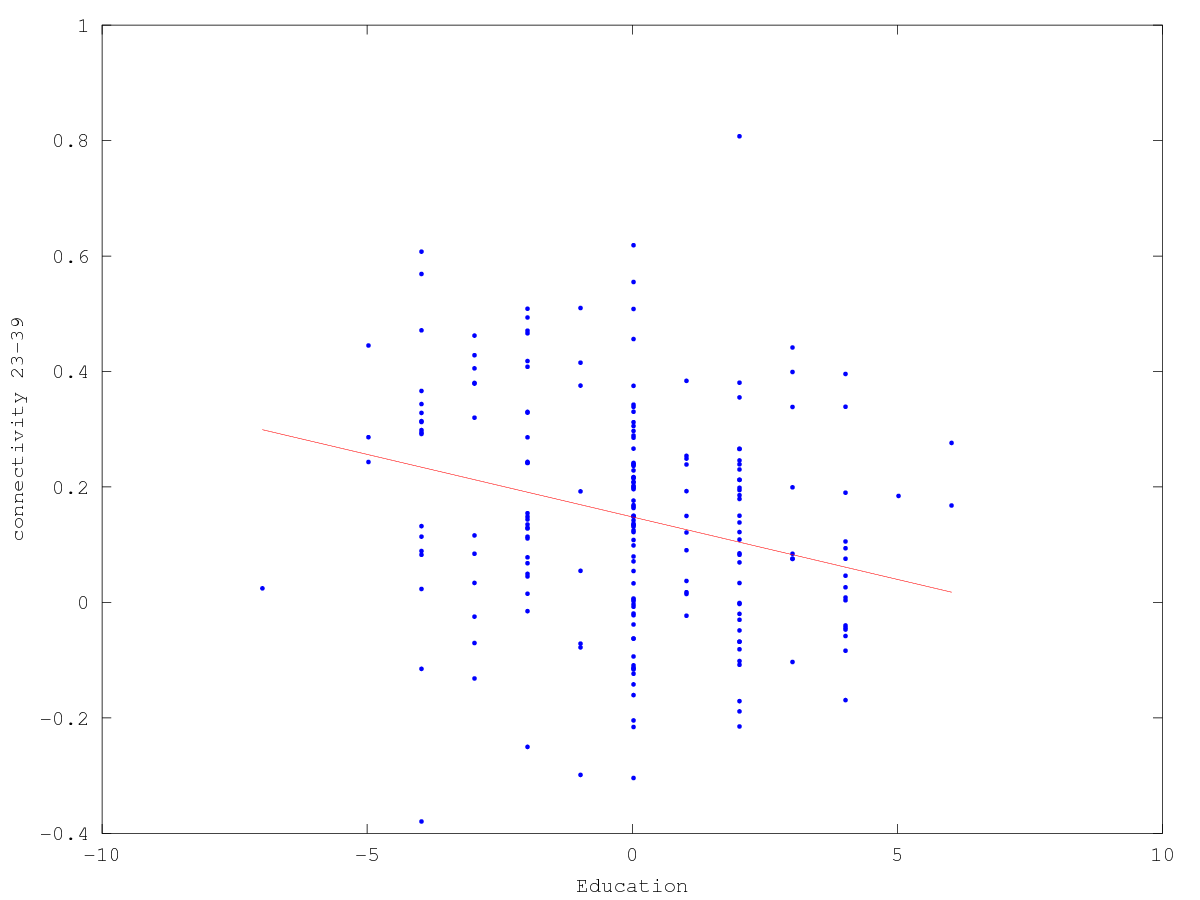

In [6]:
% First create a binary mask of the connection of interest
mask = false(size(ttest_mat));
mask(39,23) = true;
mask(23,39) = true;
% Put that mask into vector form
mask = niak_mat2lvec(mask);
% Now do the plot
plot(X(:,2),Y(:,mask),'.')
xlabel('Education')
ylabel('connectivity 23-39')
% Now generate the predicted value from the reduced model with only intercept and education
Ychap = X(:,1:2)*beta(1:2,:);
[val_min,ind_min] = min(X(:,2));
[val_max,ind_max] = max(X(:,2));
hold on
plot([val_min;val_max],Ychap([ind_min; ind_max],mask),'r')
test_q_vec = niak_mat2lvec(test_q);
fprintf('t-test: %1.2f, p value %1.5f, FDR sig %i',ttest(mask),pce(mask),test_q_vec(mask))